<a href="https://colab.research.google.com/github/shahriar31028/CSE366---Communication-Engineering-Lab-Assignment/blob/main/Task%2301.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

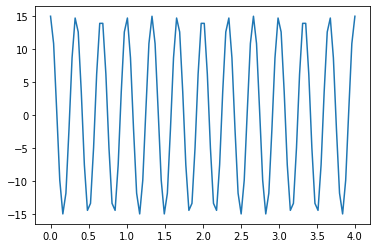

In [ ]:
import numpy as np
import matplotlib.pyplot as plot
import math

#Analog Signal#

f = 3
S = 15                       
T = 1 / f
t = np.linspace(0, 4.0, 100)
sh = S * np.cos(2.0 * np.pi * f * t)
plot.plot(t, sh)
plot.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  app.launch_new_instance()


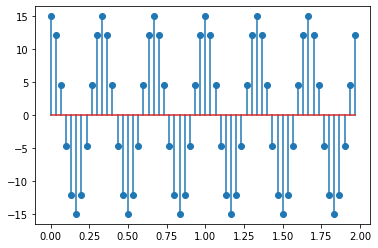

In [ ]:
############################

#Sampling# 

# Ts = T/n = 1/nf 
# Ts = 1/fs
# fs = nf

############################

number_of_sample = 10
fs = number_of_sample * f
sampling_interval = np.arange(0, 2, 1 / fs)
sampled_signal = S*np.cos(2*np.pi*f*sampling_interval); 

plot.stem(sampling_interval, sampled_signal)
plot.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


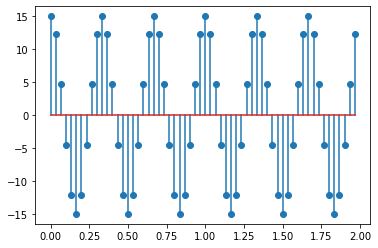

In [ ]:
############################################

#Quantization#

#Delta = (Vmax - Vmin)/L

#####################################

number_of_bit = 5
Level = 3 ** number_of_bit


Vmax = S;
Vmin=-Vmax;
delta=(Vmax-Vmin)/Level;

diff = np.arange(Vmin, Vmax, delta)
dec = np.arange(Vmin-(delta/2),Vmax+(delta/2), delta) 

quantized_signal = np.copy(sampled_signal)
encodec = np.copy(sampled_signal)

for i in range(len(diff)):
  left = dec[i]
  right = dec[i + 1]
  for j in range(len(sampled_signal)):
    if(i != len(diff) - 1 and left <= sampled_signal[j] and sampled_signal[j] < right):
      quantized_signal[j] = diff[i]
      encodec[j] = i
    if(i == len(diff) - 1 and left <= sampled_signal[j]):
      quantized_signal[j] = diff[i]
      encodec[j] = i

for i in range(len(quantized_signal)):
    quantized_signal[i] = quantized_signal[i] + (delta / 2) 

plot.stem(sampling_interval, quantized_signal)
plot.show()


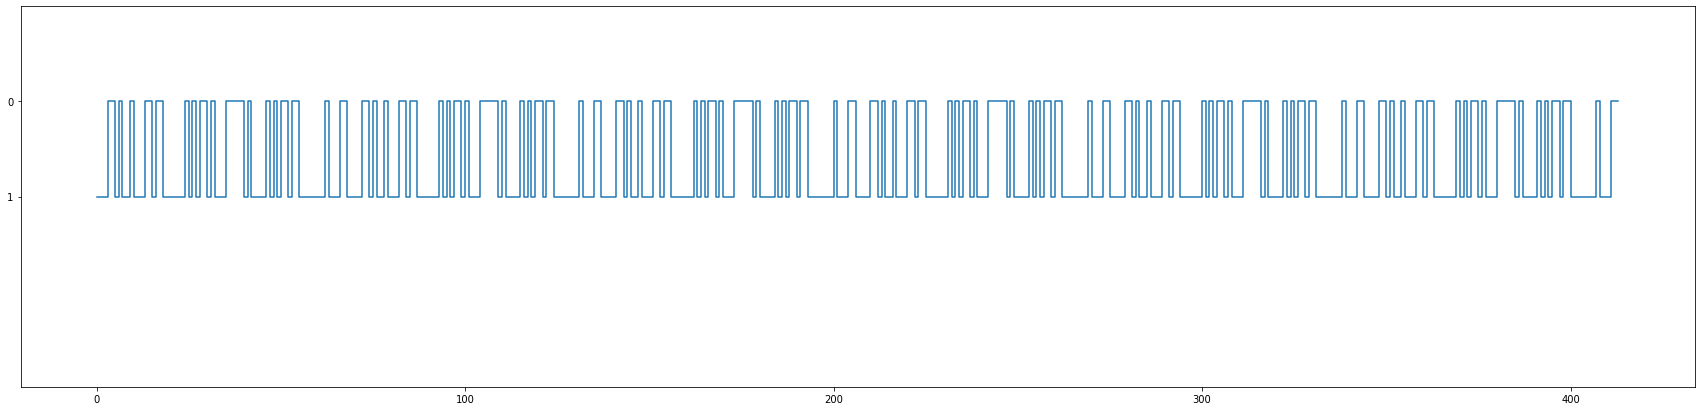

In [ ]:
####################################################
#Encoding#

#######################################


def dec_to_bin(val, bit):
    bin = "{0:b}".format(int(val))
    if(len(bin) > bit):
      return bin
    sha = bit - len(bin)
    return sha * "0" + bin


bval = []
for i in range(len(encodec)):
  bin = dec_to_bin(encodec[i],number_of_bit)
  for j in range(len(bin)):
    bval.append(bin[j])



process = np.arange(len(bval))

plot.figure(figsize=(30, 7))
plot.ylim(-2, 2)
plot.step(process, bval)
plot.show()